# Answer template

Please use this notebook for your coursework. Feel free to add more cells for your code and answers, but try to stick to this format. This will make it easier to mark everyone's work fairly.

___________________

In [381]:
!pip list

Package           Version
----------------- ------------
asttokens         2.4.1
blinker           1.7.0
click             8.1.7
colorama          0.4.6
comm              0.2.0
contourpy         1.2.0
cycler            0.12.1
debugpy           1.8.0
decorator         5.1.1
english-words     2.0.1
executing         2.0.1
Flask             3.0.0
fonttools         4.44.0
iniconfig         2.0.0
ipykernel         6.26.0
ipython           8.17.2
itsdangerous      2.1.2
jedi              0.19.1
Jinja2            3.1.2
joblib            1.3.2
jupyter_client    8.6.0
jupyter_core      5.5.0
kiwisolver        1.4.5
MarkupSafe        2.1.3
matplotlib        3.8.1
matplotlib-inline 0.1.6
nest-asyncio      1.5.8
nltk              3.8.1
numpy             1.26.0
packaging         23.2
pandas            2.1.1
parso             0.8.3
Pillow            10.1.0
pip               23.2.1
platformdirs      3.11.0
pluggy            1.3.0
prompt-toolkit    3.0.39
psutil            5.9.6
pure-eval         0.2.


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Part A – Exploratory data analysis and data visualisation 

1. Using the pandas library, read the file dataset1.csv into a dataframe. Print or display the first five rows of the dataset. [1 mark]

In [382]:
import pandas as pd
df1 = pd.read_csv('dataset1.csv')
df1.head()

,Monastery,Latitude,Longitude,City,Country,Administrative Region,Historical Region,Starting,Ending,Monastery_index
0,Cistercians,47.13,15.28,Seckau,Austria,Steiermark,STYRIA (AUSTRIA),1130,1958,0
1,Cistercians,48.05,16.13,Vienne,Austria,Niederoesterreich,STYRIA (AUSTRIA),1135,2011,0
2,Cistercians,48.61,15.20,Sanct Pölten,Austria,Niederoesterreich,STYRIA (AUSTRIA),1138,2011,0
3,Cistercians,48.20,14.74,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1142,1784,0
4,Cistercians,48.32,14.17,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1146,1945,0


2. Make a scatterplot from the dataset, with the Longitude column on the x axis, the Latitude column on the y axis, and the colour corresponding to the Monastery_index column. Within the scatterplot function, set the colour map to ’rainbow’. The result should be a scatterplot showing the position of every monastery, with different colours for monasteries with different values in Monastery_index.  [1 mark]

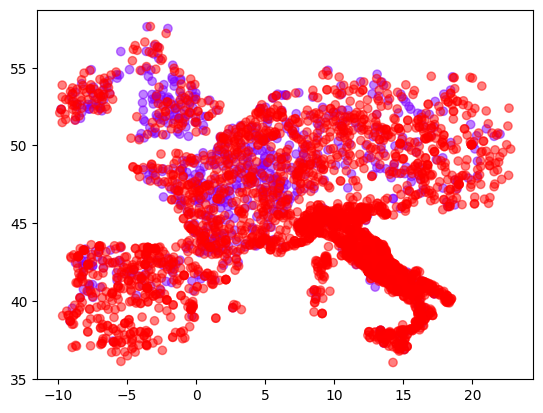

In [383]:
from matplotlib import pyplot as plt
ax = plt.scatter(df1['Longitude'], df1['Latitude'], c=df1['Monastery_index'], cmap='rainbow', alpha=0.5)

3. Plot a histogram for the monastery starting year of activity, represented in the Starting column.
Add the title “Starting year” to the plot. [1 mark]

Text(0.5, 1.0, 'Starting year')

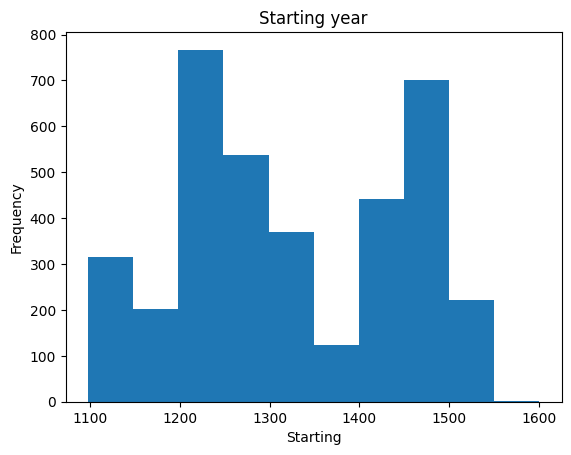

In [384]:
ax = plt.hist(df1['Starting'])
plt.xlabel('Starting')
plt.ylabel('Frequency')
plt.title('Starting year')

4. Make a figure with two histograms, still using the Starting column:

a) One histogram representing the Cistercian monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Cistercians'.

b) And one histogram representing the Franciscan monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Franciscans'.

c) Add a legend indicating which histogram corresponds to which type of monastery.

d) Add the title “Starting year” to the figure. 

[2 marks]

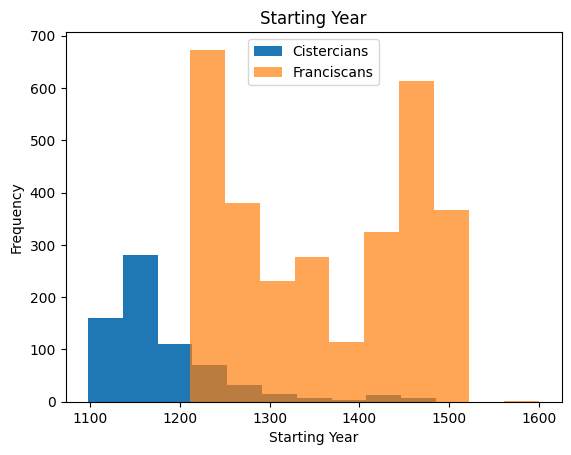

In [385]:

df1_cistercians = df1[df1['Monastery'] == 'Cistercians']
df1_franciscan = df1[df1['Monastery'] == 'Franciscans']
ax = plt.hist(df1_cistercians['Starting'])
ax = plt.hist(df1_franciscan['Starting'], alpha=0.7)
ax = plt.legend(['Cistercians','Franciscans'])
ax = plt.title('Starting Year')
ax = plt.xlabel('Starting Year')
ax = plt.ylabel('Frequency')


5. Repeat numbers 3 and 4, but for the Ending column. Add the title “Ending year” to the plot.
[2 marks]

Text(0.5, 1.0, 'Ending year')

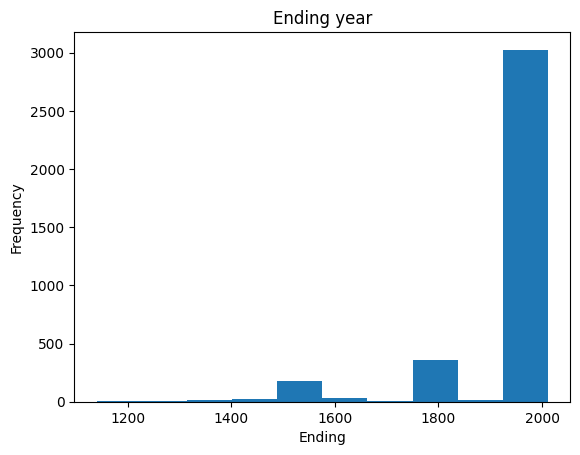

In [386]:
ax = plt.hist(df1['Ending'])
plt.xlabel('Ending')
plt.ylabel('Frequency')
plt.title('Ending year')

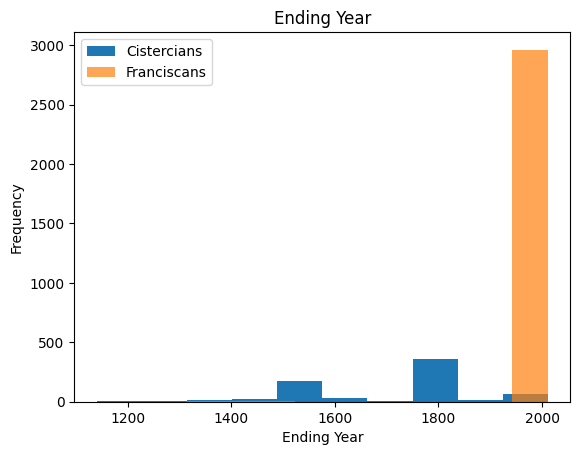

In [387]:
df1_cistercians = df1[df1['Monastery'] == 'Cistercians']
df1_franciscan = df1[df1['Monastery'] == 'Franciscans']
ax = plt.hist(df1_cistercians['Ending'])
ax = plt.hist(df1_franciscan['Ending'], alpha=0.7)
ax = plt.legend(['Cistercians','Franciscans'])
ax = plt.title('Ending Year')
ax = plt.xlabel('Ending Year')
ax = plt.ylabel('Frequency')

6. Count the number of times each country appears in the Country column. Use that to make a bar plot, showing one bar for each country, with the bar height representing how many times each country appears in the Country column. This corresponds to the number of monasteries found in each country.
[2 marks]

In [388]:
df1['Country'].value_counts()

Country
Italy             1453
France             724
Spain              418
Germany            276
UK                 180
Poland             129
Ireland             90
Hungary             69
Czech Republic      63
Portugal            59
Belgium             55
Netherlands         49
Austria             48
Switzerland         28
Slovakia            21
Slovenia            16
Name: count, dtype: int64

C:\Users\Dylan\AppData\Local\Temp\ipykernel_14060\3735552406.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a = ax.set_xticklabels(df1['Country'].value_counts().index, rotation=90)


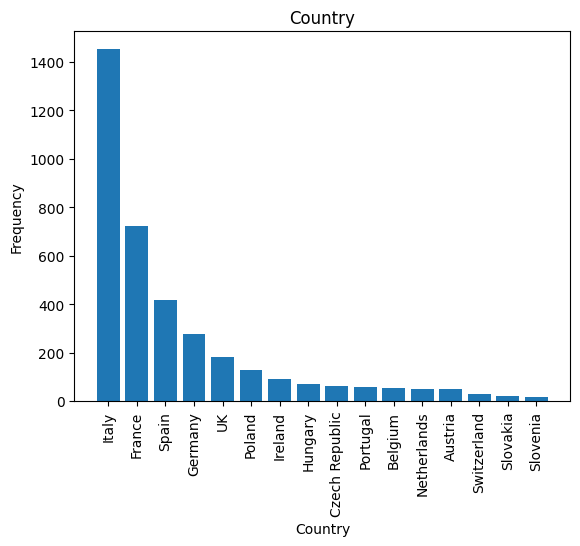

In [389]:
fig, ax = plt.subplots()
a = plt.bar(df1['Country'].value_counts().index, df1['Country'].value_counts())
a = ax.set_xticklabels(df1['Country'].value_counts().index, rotation=90)
a = plt.title('Country')
a = plt.xlabel('Country')
a = plt.ylabel('Frequency')

_____________________

# Part B – Training classifiers

7.	Define a variable X corresponding to the Starting and Ending columns of the dataset, and a variable y corresponding to the Monastery_index column. [1 mark]

In [390]:
X = df1[['Starting','Ending']]
y = df1['Monastery_index']
X.head()

,Starting,Ending
0,1130,1958
1,1135,2011
2,1138,2011
3,1142,1784
4,1146,1945


In [391]:
y
#0=Cistercians
#1=Franciscans

0       0
1       0
2       0
3       0
4       0
       ..
3673    1
3674    1
3675    1
3676    1
3677    1
Name: Monastery_index, Length: 3678, dtype: int64

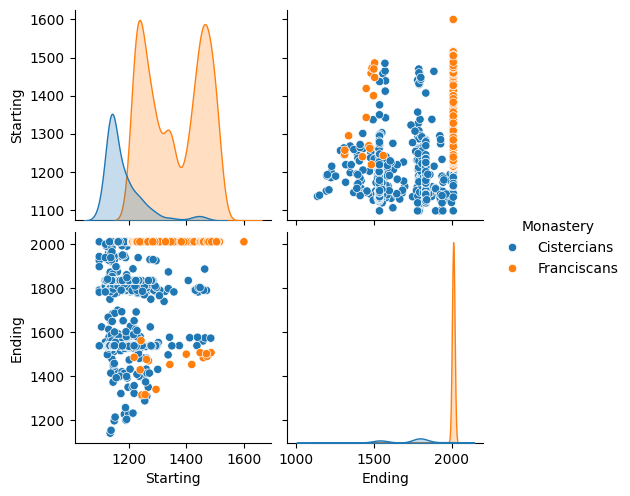

In [392]:
import seaborn as sns
tempdf = df1[['Starting','Ending','Monastery']]
sns.pairplot(tempdf, hue='Monastery')

8.	Perform a train-test split, separating X and y into a training test and a test set, leaving 33% of the data in the test set. [1 mark]

In [393]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

9.	Classification using a Perceptron:

a)	Fit a perceptron to the training data, and use it to predict y values for the test set.
[1 mark]

b)	Calculate the fraction of data points in the test set where the predicted y values and the actual y values differ. This fraction should be equal to zero if the prediction is perfect, and equal to 1 if the prediction is wrong for 100% of the test set. Print the value of that fraction in decimals (like 0.01, 0.2394, or 0.9999923).  [2 marks]

c)	Plot a confusion matrix showing how well the classifier performs on the test set. [1 mark]

d)	Treating “Franciscan” as “Positive” and “Cistercian” as “Negative”, Print out the precision, recall, accuracy and F1 score of the perceptron. [2 marks]

In [394]:
#a)
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [395]:
#b)
from sklearn.metrics import accuracy_score
aScore = accuracy_score(y_test, y_pred)
print('Accuracy score: ', 1-aScore)

Accuracy score:  0.19275123558484353


[Text(0, 0.5, 'Cistercians'), Text(0, 1.5, 'Franciscans')]

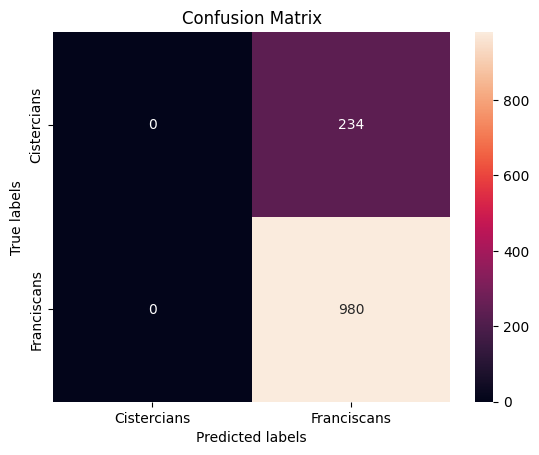

In [396]:
#c)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


import seaborn as sns  
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Cistercians','Franciscans'])
ax.yaxis.set_ticklabels(['Cistercians','Franciscans'])

In [397]:
#d)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(precision_score(y_test, y_pred, pos_label=1))
print(recall_score(y_test, y_pred, pos_label=1))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label=1))


0.8072487644151565
1.0
0.8072487644151565
0.8933454876937101


In [398]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(precision_score(y_test, y_pred, pos_label=0))
print(recall_score(y_test, y_pred, pos_label=0))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label=0))

0.0
0.0
0.8072487644151565
0.0


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10.	Classification using Logistic Regression: do the same as the question above, but using the logistic regression classifier. [4 marks]

In [399]:
#a)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [400]:
#b)
from sklearn.metrics import accuracy_score
aScore = accuracy_score(y_test, y_pred)
print('Accuracy score: ', 1-aScore)

Accuracy score:  0.025535420098846795


[Text(0, 0.5, 'Cistercians'), Text(0, 1.5, 'Franciscans')]

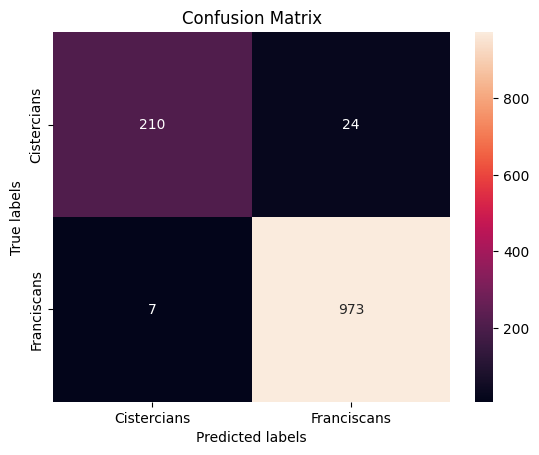

In [401]:
#c)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
import seaborn as sns  

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax) 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Cistercians','Franciscans'])
ax.yaxis.set_ticklabels(['Cistercians','Franciscans'])

In [402]:
#d)
print(precision_score(y_test, y_pred, pos_label=1))
print(recall_score(y_test, y_pred, pos_label=1))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label=1))

0.9759277833500501
0.9928571428571429
0.9744645799011532
0.9843196762771876


In [403]:
print(precision_score(y_test, y_pred, pos_label=0))
print(recall_score(y_test, y_pred, pos_label=0))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label=0))

0.967741935483871
0.8974358974358975
0.9744645799011532
0.9312638580931265


For open-ended questions like the ones below, write your answers in a new cell of code, either as a commented-out line starting with #, or as a markdown cell. Indicate what question you’re answering, by copying the question as well. For example:

11.	Explain the importance of the train-test split in machine learning. What might happen if you don’t have a proper split? [ 2 marks ]


splitting data is necessary to have reliable test data to be able to adequately assess the model’s usefulness. It also useful to be able to detect errors such as overfitting.

12.	Which classifier (Perceptron or Logistic Regression) performed better at this task? Explain how you’ve arrived at this answer. [4 marks] 

The logistic regression performed better overall as it classified the data into the two groups more effectively than the perceptron. Even despite their similar accuracy scores the perceptron only achieves this by getting all the Franciscan data correctly classified due classifying all the data into the Franciscan category. whereas logistics regression managed to find a pattern and classified well.

13.	If you run the code from questions 8, 9, and 10 again, do the scores (precision, recall, accuracy, F1) change? Why (or why not)? Explain where those scores come from, and how do they change (or don't change) if you run the code again. [3 marks]

If you run the code again both the logistics regression and the perceptron will yield different precision, recall, accuracy and f1 scores. This is due to both using stochastic algorithms to achieve the classification of the data. the scores come from: 
- precision = tp / (tp + fp), 
- recall = tp / (tp + fn),
- F1 = 2 * (precision * recall) / (precision + recall),
- accuracy = tp/N 

where:
- tp = true positives (correctly classified Franciscans)
- fp = false positives (falsely classified Franciscan)
- fn = false negatives (falsely classified Cistercians)
- N = total predictions made

The scores will change as the number of predictions that were correct and wrong (true positives and true negatives; false positives and false negatives) will change due to the randomness of both algorithms.

_______________

# Part C – Linear Regression

14. Read the file `dataset2.csv` into a dataframe. Make four scatterplots, with different variables (different columns) on the x and y axes, with the variable `quality` on the colour axis. For each scatterplot, choose a different pair of x and y variables, which cannot include `quality`. [1 mark]

In [404]:
df2 = pd.read_csv('dataset2.csv')
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


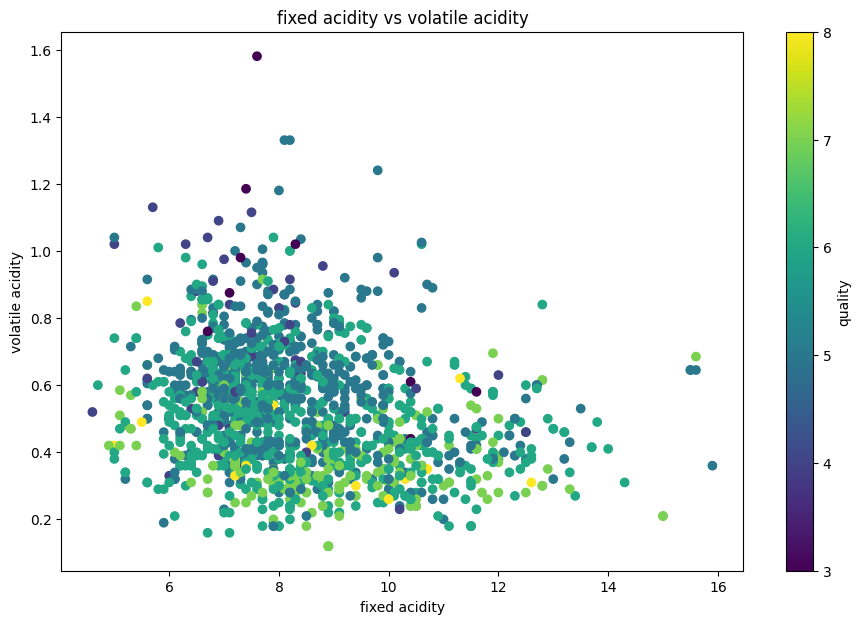

In [405]:
plt.figure(figsize=(11, 7))
scatter = plt.scatter(df2['fixed acidity'], df2['volatile acidity'],c=df2['quality'],cmap='viridis')

cbar = plt.colorbar(scatter, label='quality')
cbar.set_ticks([3,4,5,6,7,8])

#labels
plt.title('fixed acidity vs volatile acidity')
plt.xlabel('fixed acidity')
plt.ylabel('volatile acidity')
plt.show()

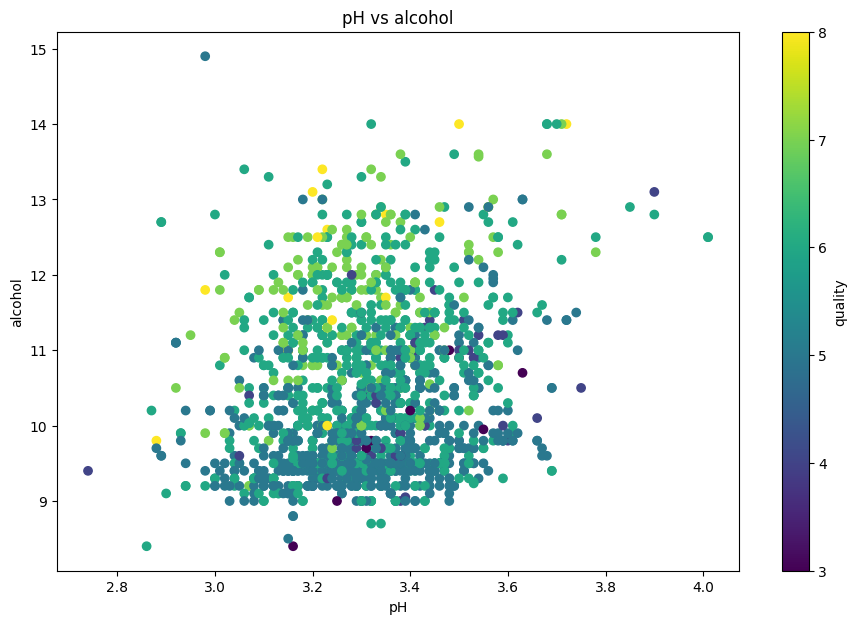

In [406]:

plt.figure(figsize=(11, 7))
scatter = plt.scatter(df2['pH'], df2['alcohol'],c=df2['quality'],cmap='viridis')

cbar = plt.colorbar(scatter, label='quality')
cbar.set_ticks([3,4,5,6,7,8])

#labels
plt.title('pH vs alcohol')
plt.xlabel('pH')
plt.ylabel('alcohol')
plt.show()

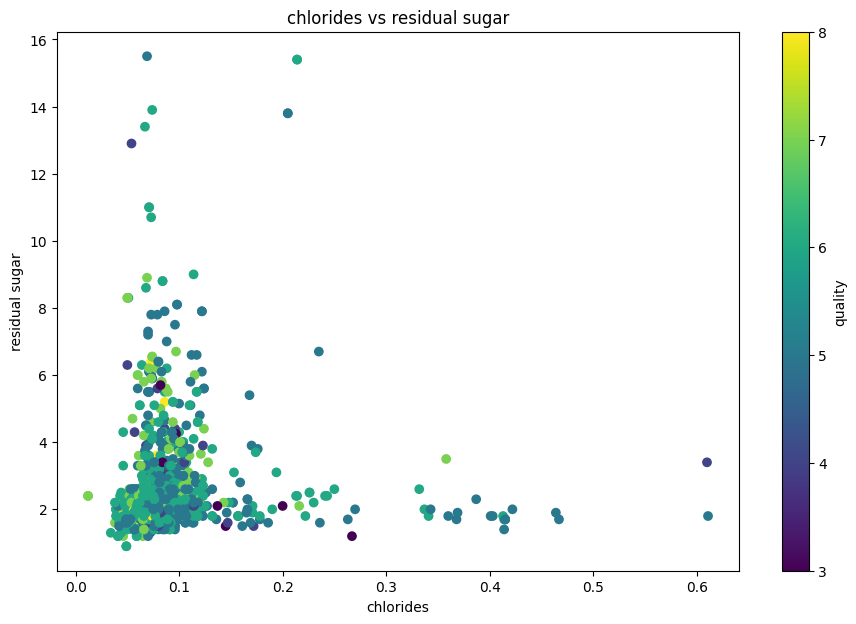

In [407]:

plt.figure(figsize=(11, 7))
scatter = plt.scatter(df2['chlorides'], df2['residual sugar'],c=df2['quality'],cmap='viridis')

cbar = plt.colorbar(scatter, label='quality')
cbar.set_ticks([3,4,5,6,7,8])

#labels
plt.title('chlorides vs residual sugar')
plt.xlabel('chlorides')
plt.ylabel('residual sugar')
plt.show()

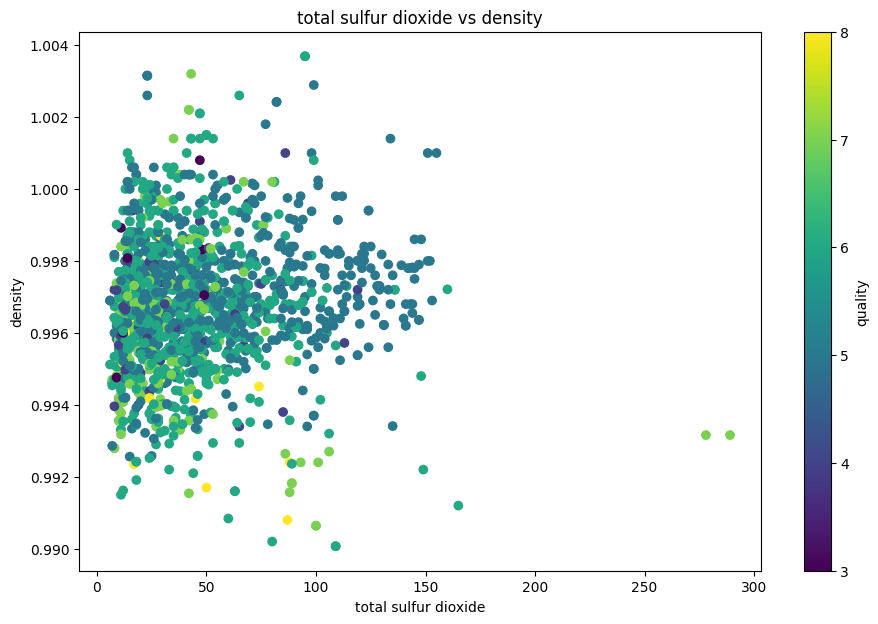

In [408]:

plt.figure(figsize=(11, 7))
scatter = plt.scatter(df2['total sulfur dioxide'], df2['density'],c=df2['quality'],cmap='viridis')

cbar = plt.colorbar(scatter, label='quality')
cbar.set_ticks([3,4,5,6,7,8])

#labels
plt.title('total sulfur dioxide vs density')
plt.xlabel('total sulfur dioxide')
plt.ylabel('density')
plt.show()

15. Print the Pearson correlation between the pairs of variables you have included in the scatterplots. 
For every pair of variables, print the names of the variables, and the corresponding correlation. 
[1 mark]

In [409]:
from scipy.stats import pearsonr
vars = [['fixed acidity','volatile acidity'],['pH','alcohol'],['chlorides','residual sugar'],['total sulfur dioxide','density']]
for i in range(4):
    x = vars[i][0]
    y = vars[i][1]
    print(x+'-'+y,':', pearsonr(df2[x],df2[y])[0])

fixed acidity-volatile acidity : -0.2561308947703822
pH-alcohol : 0.20563250850549838
chlorides-residual sugar : 0.05560953520353212
total sulfur dioxide-density : 0.0712694762031032


16. Linear regression: [2 marks]
    
a) Choosing the input variable X corresponds to any three columns of the dataset, except for `quality`, and the variable y corresponds to the `quality` column.

b) Fit a linear regression between X and y.

c) Print out the R2 score of the linear regression.

d) Print out the linear regression model’s slope coefficients and intercept.

In [410]:
#a)
X = df2[['fixed acidity','volatile acidity','citric acid']]
y = df2['quality']

In [411]:
#b)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
X_train.head()

,fixed acidity,volatile acidity,citric acid
789,8.6,0.63,0.17
787,10.0,0.56,0.24
1484,6.8,0.91,0.06
967,8.5,0.66,0.20
1217,8.2,0.34,0.37


In [412]:
#c
clf.score(X_test, y_test)

0.07726378415066626

In [413]:
#d)
print(clf.coef_)
print(clf.intercept_)

[ 0.00595199 -1.87845057  0.05535488]
6.572553330395649


17. K-fold cross-validation [3 marks]

a) Using the same X and y variables defined in the question above, perform a K-fold cross-validation of the linear regression model, with K = 10.

b) For each fold, calculate the R2 score.

c) Print the mean and standard deviation of the five R2 scores.

In [414]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [415]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.score(X_test, y_test))

-0.303050871060367
0.1708158043417276
-0.11292551876784929
0.12618702249607128
-0.15285682623158325
0.157850118105476
-0.045339549567374515
0.16661902834865017
0.16995087809053477
0.1451221263075484


18.	If, rather than choosing three columns, you had used more columns to predict quality, would the R2 score of your model necessarily be higher? Why/why not? In which circumstances would it be higher or not? (Feel free to try it! But please provide a justification for your answer) [3 marks]

Increasing the columns means more data for the model to train on. This could increase the r2 score if the data has a relationship with quality. This would make it easier to predict correctly. It could also decrease as the extra data could have little or no impact on predicting quality, making the model struggle to predict quality based on the new data given.

19.	Imagine you have two linear regressions, one with R2 = 0.80 and another with R2 = 0.90. Under what circumstances would the first model be preferable over the second one? What if instead you had two classifiers, one with accuracy = 80% and another with accuracy = 90%? [3 marks]

If the 0.8 model is less complex and easy to interpret. it may be preferred in situations where understanding the inner workings of the model’s functionality is more important than accuracy. the 0.9 accurate model could also be computationally more expensive meaning that the 0.8 model might be preferable if it can be run more efficiently. Furthermore, it could be that the 0.9 r2 model is overfitting. In context where the model is a classifier, it would generally mean that the higher accuracy model is preferable like the above statements where the 80% accurate model is simpler or more cost efficient. 

_____________________

# Part D – Clustering

20. K-means clustering:

a) Read the file `dataset3.csv` into a dataframe.

b) Define a variable X corresponding to the `Longitude` and `Latitude` columns of the dataset.

c) Using the K-means clustering algorithm and the variable X, cluster the trees 3 times, using k = 5, 10, 15.

d) Make a scatterplot showing the results of each clustering, with one colour for each cluster.
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

In [416]:
#a)
df3 = pd.read_csv('dataset3.csv')
df3.head()

,Tree_ID,Address,Town,Tree_Species,Species_Desc,Common_Name,Age_Desc,Height,Spread,Trunk,Actual_Trunk,Condition,Latitude,Longitude
0,27092,"Clonard Court, Balbriggan",Balbriggan,ACSA,Acer saccharinum,Silver Maple,Semi-Mature,5.1-10 metres,3 to 6 metres,11cm to 20cm,18cm,Good,53.606325,-6.186424
1,29144,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,1cm - 10cm,10cm,Fair - Poor,53.447465,-6.247613
2,29160,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,11cm to 20cm,11cm,Good,53.447695,-6.248258
3,29400,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,1cm - 10cm,10cm,Good,53.445606,-6.246236
4,246560,"Lanesborough Grove, Saint Margaret's",Santry,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,3 to 6 metres,11cm to 20cm,13cm,Fair to Good,53.404309,-6.291646


In [417]:
X = df3[['Longitude','Latitude']]
X.head()

,Longitude,Latitude
0,-6.186424,53.606325
1,-6.247613,53.447465
2,-6.248258,53.447695
3,-6.246236,53.445606
4,-6.291646,53.404309


In [418]:
from sklearn.cluster import KMeans
kMeans_predicted = []
bins = [5,10,15]
for i in bins:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    kMeans_predicted.append(y_pred)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


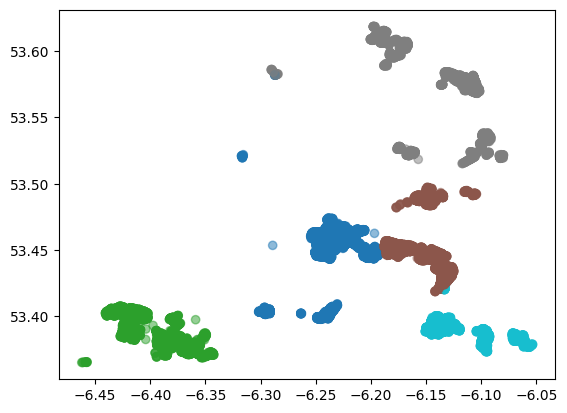

In [419]:
#make a scatter plot
scatter = plt.scatter(df3['Longitude'], df3['Latitude'],c=kMeans_predicted[0],cmap='tab10', alpha=0.5)

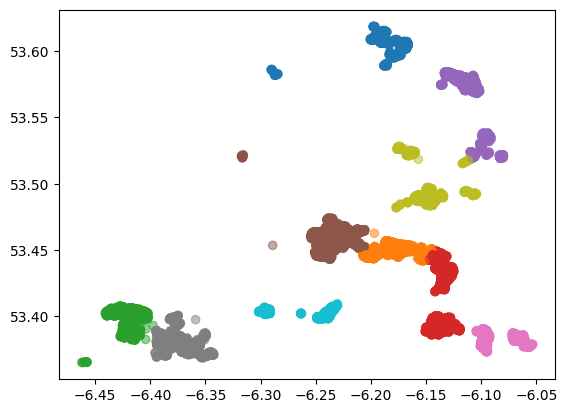

In [420]:
scatter = plt.scatter(df3['Longitude'], df3['Latitude'],c=kMeans_predicted[1],cmap='tab10', alpha=0.5)

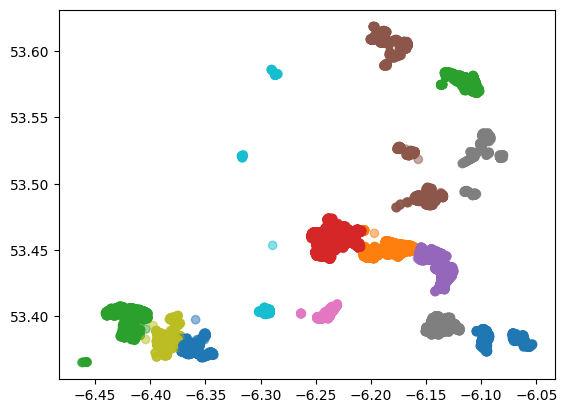

In [421]:
scatter = plt.scatter(df3['Longitude'], df3['Latitude'],c=kMeans_predicted[2],cmap='tab10', alpha=0.5)

21. DBSCAN clustering:

a) Using the same X variable as above, using the DBSCAN clustering algorithm, cluster the trees a total of 4 times, setting the eps parameter to 0.001, 0.005, 0.01, 0.05.

b) Make a scatterplot showing the results of each clustering, with one colour for each cluster. 
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

In [422]:
#now do the same with dbscan
from sklearn.cluster import DBSCAN
DBSCAN_predicted = []
eps = [0.001, 0.005, 0.01, 0.05]
for i in eps:
    dbscan = DBSCAN(eps=i)
    dbscan.fit(X)
    y_pred = dbscan.labels_
    DBSCAN_predicted.append(y_pred)



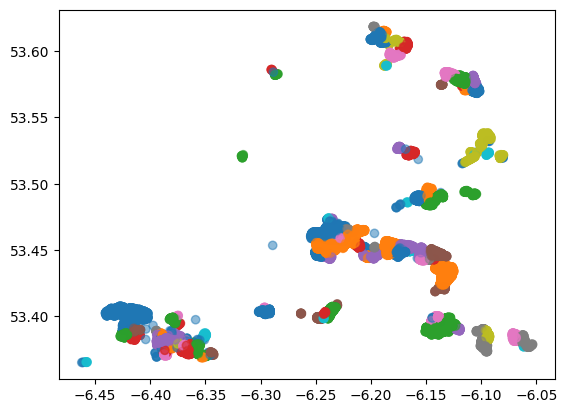

In [423]:
scatter = plt.scatter(df3['Longitude'], df3['Latitude'],c=DBSCAN_predicted[0],cmap='tab10', alpha=0.5)

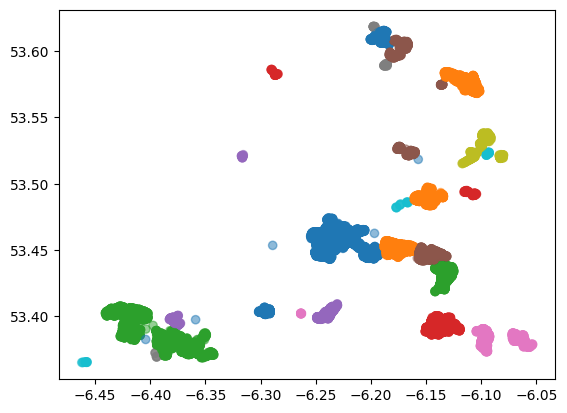

In [424]:
scatter = plt.scatter(df3['Longitude'], df3['Latitude'],c=DBSCAN_predicted[1],cmap='tab10', alpha=0.5)

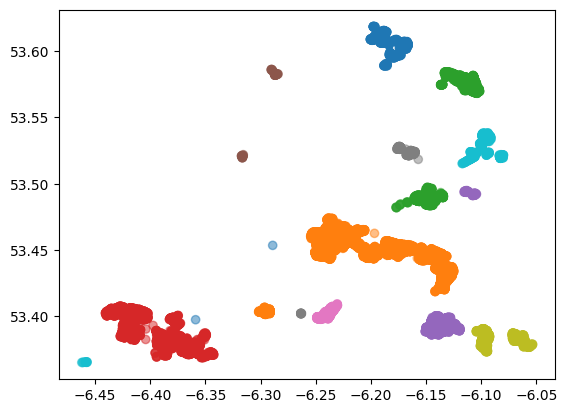

In [425]:
scatter = plt.scatter(df3['Longitude'], df3['Latitude'],c=DBSCAN_predicted[2],cmap='tab10', alpha=0.5)

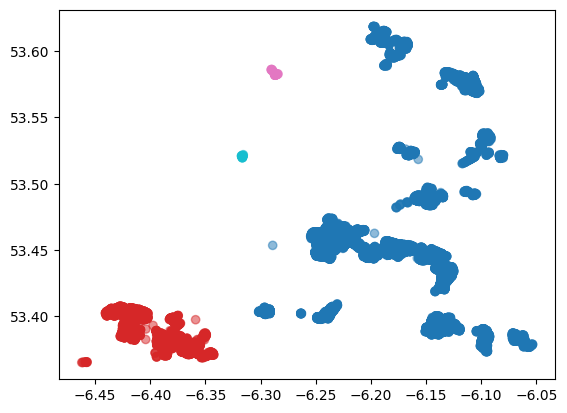

In [426]:
scatter = plt.scatter(df3['Longitude'], df3['Latitude'],c=DBSCAN_predicted[3],cmap='tab10', alpha=0.5)

22. Using the Silhouette score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the 
best clustering, according to the Silhouette score? [2 marks]

In [427]:
#perform a sillhouette analysis
from sklearn.metrics import silhouette_score
k_means_silhouette_scores = {}
dbscan_silhouette_scores = {}
for i in range(3):
    txt = "K-Means with "+str(bins[i])+" bins"
    k_means_silhouette_scores[txt] = silhouette_score(X, kMeans_predicted[i])
for i in range(4):
    txt = "DBSCAN with "+str(eps[i])+" eps"
    dbscan_silhouette_scores[txt] = silhouette_score(X, DBSCAN_predicted[i])

print(k_means_silhouette_scores)
print(dbscan_silhouette_scores)

{'K-Means with 5 bins': 0.5964936600982642, 'K-Means with 10 bins': 0.6119776250811857, 'K-Means with 15 bins': 0.6629135508247944}
{'DBSCAN with 0.001 eps': 0.24654779191419357, 'DBSCAN with 0.005 eps': 0.5407076619493659, 'DBSCAN with 0.01 eps': 0.393094609216632, 'DBSCAN with 0.05 eps': 0.43883380804344585}


23. Using the Davies-Bouldin score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the best clustering according to the Davies-Bouldin score? [2 marks]

In [428]:
#perform a Davies-Bouldin analysis
from sklearn.metrics import davies_bouldin_score
k_means_Davies_Bouldin_scores = {}
dbscan_Davies_Bouldin_scores = {}
for i in range(3):
    txt = "K-Means with "+str(bins[i])+" bins"
    k_means_Davies_Bouldin_scores[txt] = davies_bouldin_score(X, kMeans_predicted[i])
for i in range(4):
    txt = "DBSCAN with "+str(eps[i])+" eps"
    dbscan_Davies_Bouldin_scores[txt] = davies_bouldin_score(X, DBSCAN_predicted[i])

print(k_means_Davies_Bouldin_scores)
print(dbscan_Davies_Bouldin_scores)

{'K-Means with 5 bins': 0.5866373464677439, 'K-Means with 10 bins': 0.5470307712102767, 'K-Means with 15 bins': 0.43519310588832505}
{'DBSCAN with 0.001 eps': 1.304980996503088, 'DBSCAN with 0.005 eps': 0.8701655709920809, 'DBSCAN with 0.01 eps': 0.5967046437447137, 'DBSCAN with 0.05 eps': 0.44518863489975385}


24. Using another clustering algorithm (not K-means, not DBSCAN), and a range of hyperparameter values if appropriate, cluster the trees according to their latitude and longitude, as above. According to the silhouette and Davies-Bouldin scores, does any of your model runs produce better clustering? [2 marks]

In [429]:

from sklearn.cluster import AgglomerativeClustering
agglomerative_predicted = []
n_clusters = [5,10,15]
for i in n_clusters:
    agglomerative = AgglomerativeClustering(n_clusters=i)
    agglomerative.fit(X)
    y_pred = agglomerative.labels_
    agglomerative_predicted.append(y_pred)


In [430]:
Agglomerative_silhouette_scores = {}
for i in range(3):
    txt = "AgglomerativeClustering "+str(n_clusters[i])+" clusters"
    Agglomerative_silhouette_scores[txt] = silhouette_score(X, agglomerative_predicted[i])
print("silhouette_scores: ---------------------->")
print(Agglomerative_silhouette_scores)

Agglomerative_davies_bouldin_scores = {}
for i in range(3):
    txt = "AgglomerativeClustering with "+str(n_clusters[i])+" clusters"
    Agglomerative_davies_bouldin_scores[txt] = davies_bouldin_score(X, agglomerative_predicted[i])
print("davies_bouldin_scores: ---------------------->")
print(Agglomerative_davies_bouldin_scores)

silhouette_scores: ---------------------->
{'AgglomerativeClustering 5 clusters': 0.5797926764830069, 'AgglomerativeClustering 10 clusters': 0.6014323833756522, 'AgglomerativeClustering 15 clusters': 0.650415832559293}
davies_bouldin_scores: ---------------------->
{'AgglomerativeClustering with 5 clusters': 0.6239010143363466, 'AgglomerativeClustering with 10 clusters': 0.5501221097836109, 'AgglomerativeClustering with 15 clusters': 0.4361702688593319}


Text(0.5, 1.0, 'Silhouette Score Comparison')

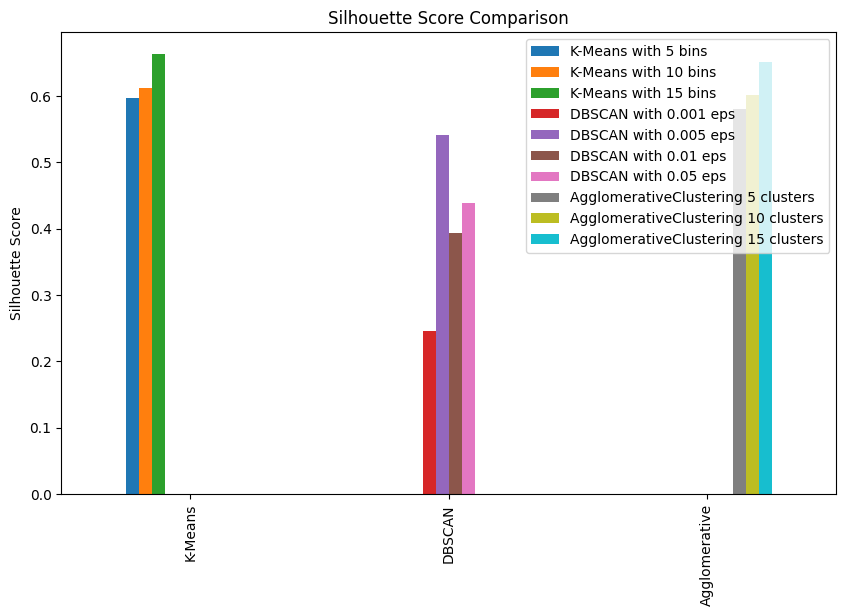

In [431]:
silhouettedf = pd.DataFrame([k_means_silhouette_scores, dbscan_silhouette_scores, Agglomerative_silhouette_scores])
silhouettedf.index = ['K-Means', 'DBSCAN', 'Agglomerative']
silhouettedf.plot(kind='bar', figsize=(10,6))
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Comparison')

Text(0.5, 1.0, 'Davies Bouldin Score Comparison')

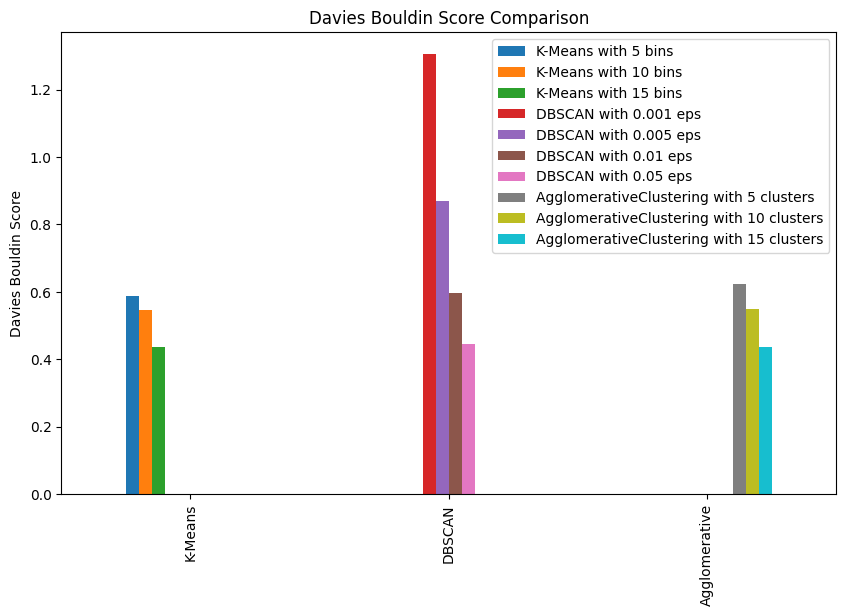

In [432]:
davies_bouldindf = pd.DataFrame([k_means_Davies_Bouldin_scores, dbscan_Davies_Bouldin_scores, Agglomerative_davies_bouldin_scores])
davies_bouldindf.index = ['K-Means', 'DBSCAN', 'Agglomerative']
davies_bouldindf.plot(kind='bar',figsize=(10,6))
plt.ylabel('Davies Bouldin Score')
plt.title('Davies Bouldin Score Comparison')

considering that lower Davies Bouldin scores and higher Silhouette scores imply better clustering, from the graphs above, it is indicated that using agglomerative with high clusters achieves the best result. K-means and low eps's dbscans is not too far from agglomerative despite this. But DBSCAN seems to achieve results which are not as good when employing high eps's.

25. Usually, DBSCAN takes longer than K-means to run, and the time it takes to run is affected by the eps parameter. Explain why that is the case. [4 marks]

The eps argument in the DBSCAN clustering algorithm defines the maximum distance between two data points for one to be considered as in the "neighbourhood" of the other. A larger eps results in a larger neighbourhood, potentially encompassing more data points. This means that for each data point a calculation must be made to see how far it is from other datapoints and these calculations increase with higher eps. Furthermore, dbscan has to filter out outliers which requires more calculations to be made. 

26. Provide an example of one case in which it might be better to use DBSCAN rather than K-means, and an example of one case in which it might be better to use K-means rather than DBSCAN. Explain why, in both cases. [4 marks]

dbscan will perform better with outliers and noisy data. This is because dbscan works by the identifying high density of points instead of trying to find distributions or shapes. K Means will run more efficiently on high dimensional data sets then dbscan. This is because it has a linear time complexity.

_____________________

# Part E – Model selection

27. Consider the figure in the PDF and compare models A and B. In each case, what difference would it make to add more training examples to the training set? Explain your reasoning. [4 marks]

 figure A finds an optimal model with less training samples but has high bias error rate. Figure B does not find an optimal model within the graph but seems to approach one with increasing training samples. Adding training data to figure A would have little effect on improving the model. Whereas figure B would benefit with more training data and would have a lower bias error rate then A.

28.	Consider the second figure in the PDF and compare models A, B, and C. What is the difference between the three models? How does that relate to the bias-variance trade-off? [6 marks]

Figure A, B and C all improve up to 100 data points of training data. Figure A shows a bad model as the error is high and Figure B shows a good model with a low error level. Figure C shows a model where increasing training data does not improve testing results this could be due to overfitting. Figure A shows a model with high bias and low variance. Figure B shows a model with low bias and high variance and figure C shows a model with low bias and high variance. Figure B shows a good model and improvement will not be needed. Figure A could be improved using better data. Figure C could be improved using training data with more variety. 

29.	What is overfitting? Why is that a problem, and how can one avoid it? [3 marks]

overfitting is when the model trains too precisely on the training data. because of this it will unlikely find a pattern and will struggle to predict unseen testing data correctly.

________________

# Part F – Dimensionality reduction

Consider a scenario where you are working with a complex high-dimensional dataset derived from a biomedical application to detect a disease. The data is expected to have both linear and non-linear relationships, and you aim to reduce the dimensionality for the following purposes: first, to visualize the data in a lower-dimensional space to identify potential clusters or patterns that might indicate different disease states, and second, to preprocess the data for a downstream machine learning task, such as classification of samples into healthy or diseased states. 

30.	Discuss the advantages and disadvantages of using PCA, t-SNE, and UMAP for the visualization purpose, considering factors such as the preservation of local and global structures, computational efficiency, and the potential introduction of artifacts. [3 marks]

One advantage of using PCA is that it is computationally efficient, but it assumes that there is a linear relationship within the data which may not be suitable for the disease dataset. T-SNE comes in useful for situations in finding patterns in the data and maintaining local structures. T-SNE lacks in being computationally expensive. U-MAP is effective at maintaining global structures and like T-SNE it can maintain local structures. The downside of using this is it requires fine and careful tuning to be done correctly.

31.	Explain how the choice between these dimensionality reduction techniques might change when, after visualising, you want to do the preprocessing for the machine learning task. [3 marks]

for the main goal of finding global structures PCA can show these relationships with low computer cost. This will show a useful subset of the dataset that can be used to find useful linear realtionships. The issue with this is that there might not be a useful linear relationship to note. Using UMAP or T-SNE on the other hand will find many types of non-linear relationhips. 

32.	Discuss the role of interpretability and stability in the choice of dimensionality reduction technique for both tasks. How might the stochastic nature of t-SNE and UMAP influence the reproducibility of your analyses, and how can PCA's linear assumptions limit its usefulness in capturing complex relationships in the data? [3 marks]

using PCA will most likely produce a more interpretable form of dimensionality reduction, as it creates linear combinations of data. Whereas while t-SNE and UMAP are less interpretable they provide more complexity in terms of data connections. Higher complexity would mean higher likely hood of more working models being found. PCA could also be seen as more stable due to its deterministic nature, meaning it will produce the same results each runtime. t-SNE and UMAP are both stochastic in nature meaning some randomness is involved, implying that results will not be the same after each runtime.  

________________

# Part G – Applications of Machine Learning

33.	Discuss a scenario where a high accuracy rate might be misleading in evaluating the performance of a classifier. What other metrics would you consider, and why? [3 marks]

In the case of a spam detection classifier for emails, if the model generated were to have a high accuracy for example 95% or higher, it could be seen that the model achieves its goal extremely well. This could be an infective model despite this fact, as the high accuracy could be achieved by using a dataset with an unhelpful distribution of spam emails to non-spam emails, e.g. 2% non-spam 98 % spam. in this example the model could simply predict that every email is a spam email and have a high accuracy. other metrics to consider would be the precision score. both would help to identify how well the model does on both classifications, instead of both as a whole, in the example before it would unveil that the non-spam detection would be negligible.  

34. Given a classification task and a dataset, sometimes it’s impossible to make a classifier with 100% precision and 100% recall simultaneously. Explain why. [3 marks]

in practice it is mostly impossible to achieve 100% in both precision and recall. This is because they have an inverse relationship with each other. So as precision increases so less false positives the recall decreases due to less false negatives. It best finds a desired trade of between the two and can be found using the f1 score.

35. In the case of the question above, the data scientist might have to choose between having higher precision or higher recall. Provide an example where it’s preferable to get high recall and low precision (and explain why), and another example where it’s preferable to have high precision and low recall (and explain why). [4 marks]

one example is in the case of classifying with high pression would be for identifying rare diseases among patient. Having high precision would lead to identifying patients with the rare disease more often and decrease misdiagnoses. High recall would be useful in the scenario of detecting illegal items being passed through an airport. This is because high recall would mean that the model would be correct in identifying the illegal item most of the time.

Over this module we explained many examples where a machine learning algorithm was trained on a dataset and became reasonably good at a task, but had a fundamental flaw in its training dataset or feature engineering that ultimately made the model inaccurate or inappropriate for use in real life.

36. Give an example of a machine learning algorithm trained for a particular task where it achieves high accuracy in one context, but low accuracy in another context. Explain what could cause that, how to diagnose it, and suggest a way to address it. [4 marks]

A good example of this would be on an image classification model. For example, the detection on whether an image is any normal house cat or a bob cat. The issue could arise, when although the model may get the classification of images correctly, it classifies them based on factors that may have nothing to do with the characteristics of a bob cat. For example, the background could be snowy or have more wildlife compared to any normal house cat. So the model simply classifies the image based on the background instead of finding features of bob cats and house cats. The best way to diagnose the model is by testing it on data to trick the model e.g. a house cat in a snowy environment, or a bob cat with manmade structures behind it. To address this issue, the training dataset should be changed to have more variety of bob cats and house cats in many different contexts.

37. Give an example of a machine learning algorithm that might have low error in its training and testing datasets, but that still would have a fundamental flaw in its application that is not captured by the error metric. Explain why that is the case, and suggest a way to address that. [3 marks]

A good example is a model to predict if a patient has a certain rare disease. If there is low error in both training and testing, but the model fails when applied into real life this could be due to overfitting. This is because the data given works well but when exposed to new data it fails to find the pattern and incorrectly diagnoses a patent. A good way of addressing the issue is by using k-fold validation to assess different ratios of testing to training data.

_________________